C:\Users\loren\AppData\Local\Temp\ipykernel_15212\2675765309.py:50: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from current font.
  plt.savefig(save_path + f'correlation_between_{xb}_and_{yb}.png')
C:\Users\loren\AppData\Local\Temp\ipykernel_15212\2675765309.py:50: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from current font.
  plt.savefig(save_path + f'correlation_between_{xb}_and_{yb}.png')
C:\Users\loren\AppData\Local\Temp\ipykernel_15212\2675765309.py:50: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  plt.savefig(save_path + f'correlation_between_{xb}_and_{yb}.png')
C:\Users\loren\AppData\Local\Temp\ipykernel_15212\2675765309.py:50: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  plt.savefig(save_path + f'correlation_between_{xb}_and_{yb}.png')
C:\Users\loren\AppData\Local\Temp\ipykernel_15212\2675765309.py:50: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from c

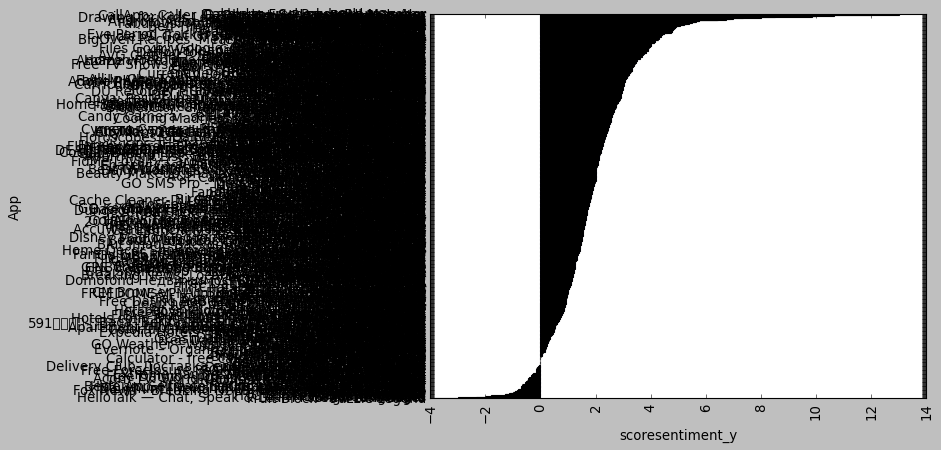

In [3]:
# Importa le dipendenze
import pandas as pd
import json
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

# Variabili d'ambiente
config_path = 'D:/Reepo_Git/Google_play_store/'
with open(config_path + 'config.json', 'r') as file:
    config = json.load(file)
    
clean_data_path = config['clean_data_path']
images_path = config['images_path']
file_sentiment = 'sentiment_analysis_db.csv'

sentiment_db = pd.read_csv(clean_data_path + file_sentiment)



class DataVisualizer:                                                 
    def __init__(self, dataframe, style="classic"):
        
        """Inizializza la classe DataVisualizer."""
        
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("The provided data is not a DataFrame.")
        
        self.db = dataframe
        self.style = style

    def barplot(self, xb, yb, save_path=None):
        
        """Visualizza un barplot."""
        
        # Controllo esistenza colonne
        if xb not in self.db.columns or yb not in self.db.columns:
            raise ValueError(f"Columns {xb} or {yb} not found in the DataFrame.")
        
        plt.style.use(self.style)
        
        # Calcolo dell'ordine per il barplot
        order = self.db[[xb, yb]].groupby(yb).mean().sort_values(by=xb, ascending=False).index
        
        sns.barplot(data=self.db, x=self.db[xb], y=self.db[yb], order=order)
        plt.xticks(rotation=90)
        
        # Salvataggio grafico 
        if save_path:
            plt.savefig(save_path + f'correlation_between_{xb}_and_{yb}.png')
        plt.show()
        

    def correlation(self, columns=None, cmap="coolwarm", save_path=None):
        
        """Visualizza una heatmap di correlazione."""
        
        if columns is None:
            columns = [col for col in self.db.columns if self.db[col].dtype == "float"]
        
        plt.style.use(self.style)
        sns.heatmap(self.db[columns].corr(), annot=True, cmap=cmap)
        
        
        # Salvataggio grafico 
        if save_path:
            plt.savefig(save_path + f'correlation_between_{xb}_and_{yb}.png')
        plt.show()

def visualizer(sentiment_analysis_db):
    
    
    dataviz = DataVisualizer(sentiment_analysis_db)
    dataviz.barplot(xb="scoresentiment_y", yb="App", save_path= images_path)
    #dataviz.correlation()

# Eseguiamo la funzione migliorata
visualizer(sentiment_db)
